# Ruptures with ECG data 

**Motivation** change point detection with ECG data

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ruptures as rpt

In [3]:
cd ../../../Data/fusrp_2

C:\Users\Lauren\Data\fusrp_2


### MIT data

In [6]:
signal = pd.read_csv("MIT_500_s.csv", header=None).values

# choose a segment
sig = signal[5000:15000]

# change point detection
model = "rbf"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model=model).fit(sig)
# my_bkps = algo.predict(n_bkps=3)
# my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
# setting own penalties
my_bkps = algo.predict(pen=2) 

# show results
rpt.show.display(sig, my_bkps, figsize=(10, 6))
plt.show()

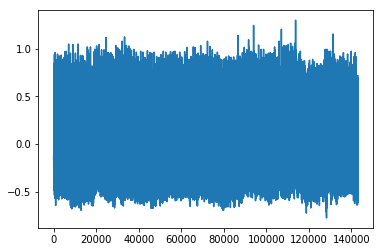

In [84]:
# plotting the whole signal
plt.plot(signal)

#### Pelt 
Pruning rule used -- less computation still can find optimal segmentation.

The minimum distance between change points can be set through the keyword 'min_size'; through the parameter 'jump', only change point indexes multiple of a particular value are considered.

In [49]:
# choosing a smaller segment
sig2 = signal[0:1000] 

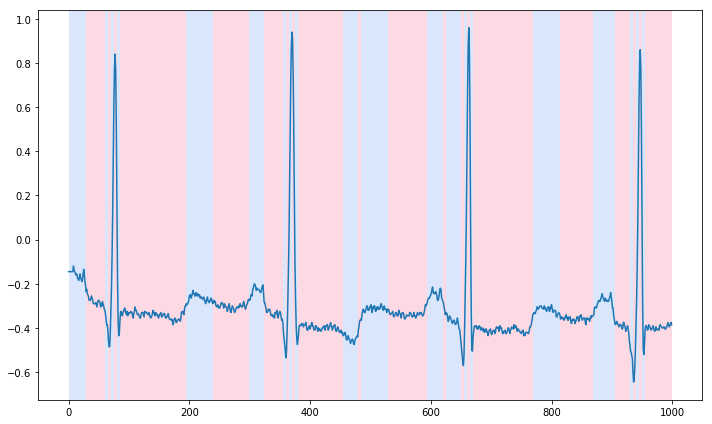

In [104]:
# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(sig2)
my_bkps = algo.predict(pen=.01)

# show results
fig, (ax,) = rpt.display(sig2, my_bkps, figsize=(10, 6))
plt.show()

#### Testing on first derivative of the data

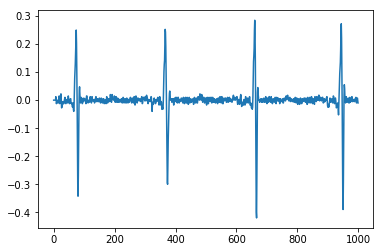

In [78]:
plt.plot(np.gradient(np.ravel(sig2),1))

In [79]:
dsig2 = np.gradient(np.ravel(sig2),1)

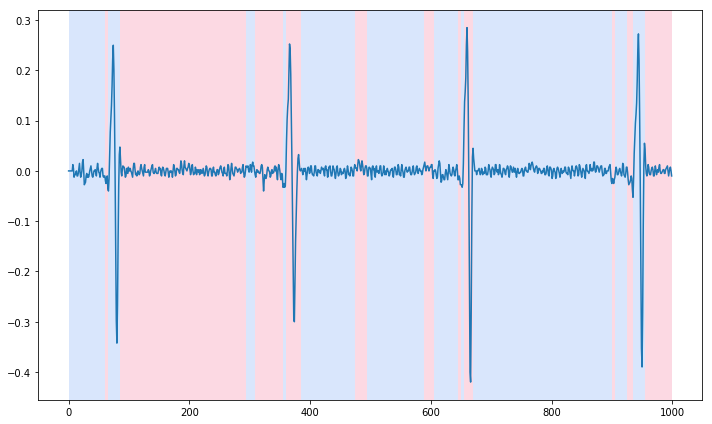

In [112]:
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(dsig2)
my_bkps = algo.predict(pen=1.5)

# show results
fig, (ax,) = rpt.display(dsig2, my_bkps, figsize=(10, 6))
plt.show()

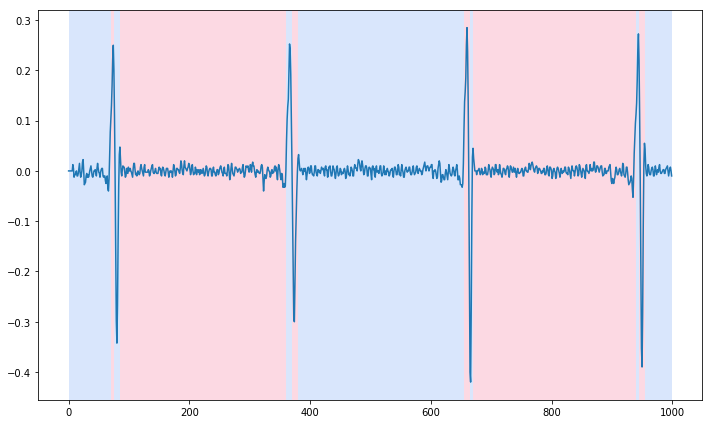

In [119]:
# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(dsig2)
my_bkps = algo.predict(pen=0.07)

# show results
fig, (ax,) = rpt.display(dsig2, my_bkps, figsize=(10, 6))
plt.show()

#### Window on first derivative

C:\Users\Lauren\Anaconda3\lib\site-packages\ruptures\costs\costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


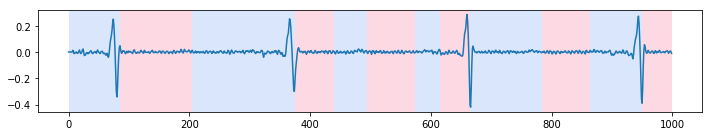

In [141]:
# using autoregression model for window
model = "ar"  # "l1", "rbf", "linear", "normal", "ar" 

algo = rpt.Window(width=40, model=model).fit(dsig2)
my_bkps = algo.predict(n_bkps=125)

# show results
rpt.show.display(dsig2, my_bkps)
plt.show()

## Segmented ECG data with known abnormal beats

In [7]:
cd entropy

C:\Users\Lauren\Data\fusrp_2\entropy


In [8]:
file_name = "ECG200_TEST.csv"
test_df = pd.read_csv(file_name, header=None)
data = np.ravel(test_df.drop(0, axis=1))

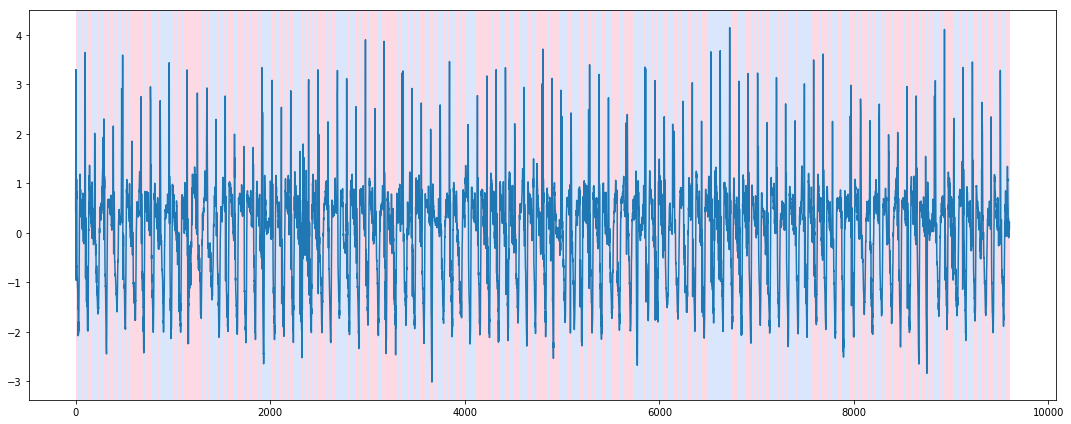

In [150]:
# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(data)
my_bkps = algo.predict(pen=0.07)

# show results first glance
fig, (ax,) = rpt.display(data, my_bkps, figsize=(15, 6))
plt.show()

#### Closer look

In [11]:
test_data = np.ravel(test_df[0:10].drop(0, axis=1))

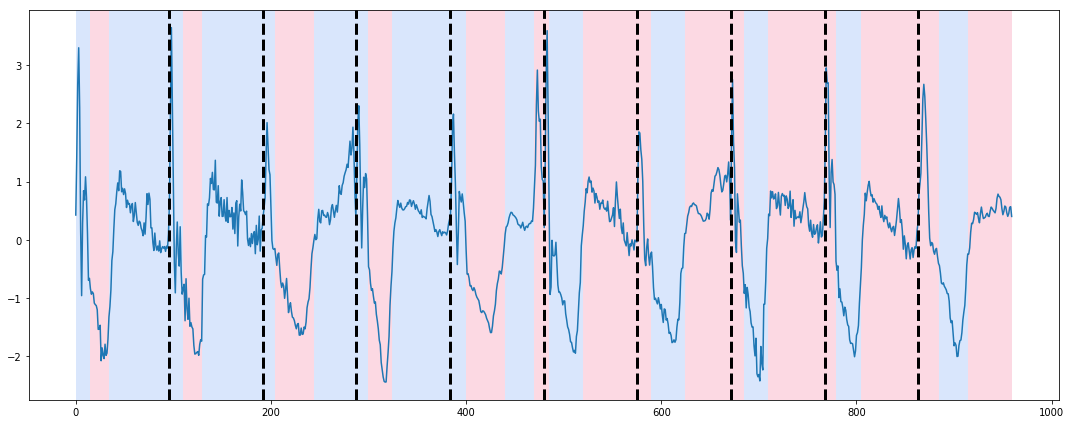

In [33]:
# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(test_data)
my_bkps = algo.predict(pen=20)
bkps = np.arange(96,960,96)

# show results
fig, (ax,) = rpt.display(test_data, my_bkps, bkps, figsize=(15, 6))
plt.show()

### Simulated Data
double noise to signal ratio, calculating the difference in PCA

In [41]:
pca_pt5 = pd.read_csv("pt5NSR_csv_pcadiff.csv", header=None)

In [42]:
pca_pt5_test = np.ravel(pca_pt5.drop(0, axis=1))

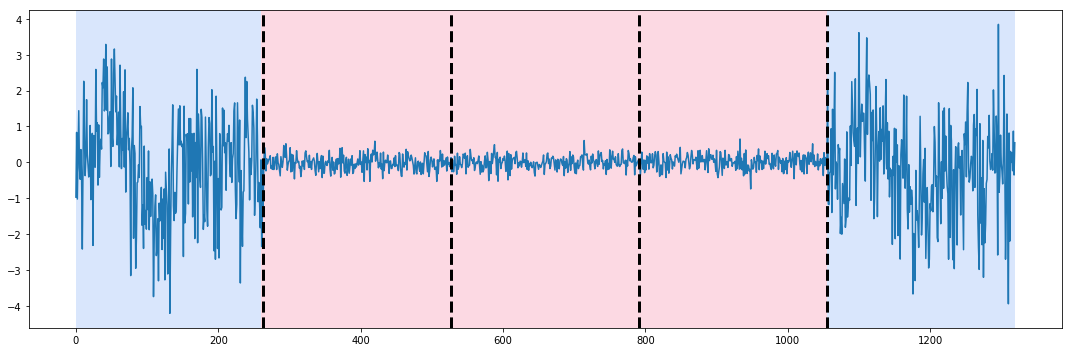

In [63]:
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(pca_pt5_test[0:5*264])
my_bkps = algo.predict(pen=5)
heartbeat, hb_pts = pca_pt5[0:5*264].drop(0, axis=1).shape
bkps = np.arange(hb_pts, heartbeat*hb_pts, hb_pts)

# show results
fig, (ax,) = rpt.display(pca_pt5_test[0:5*264], my_bkps, bkps, figsize=(15, 5))
plt.show()

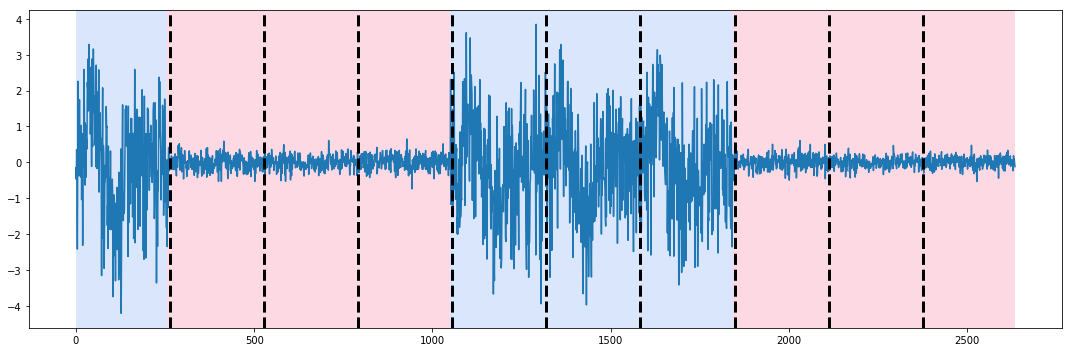

In [65]:
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(pca_pt5_test[5:10*264])
my_bkps = algo.predict(pen=5)
heartbeat, hb_pts = pca_pt5[5:10*264].drop(0, axis=1).shape
bkps = np.arange(hb_pts, heartbeat*hb_pts, hb_pts)

# show results
fig, (ax,) = rpt.display(pca_pt5_test[5:10*264], my_bkps, bkps, figsize=(15, 5))
plt.show()

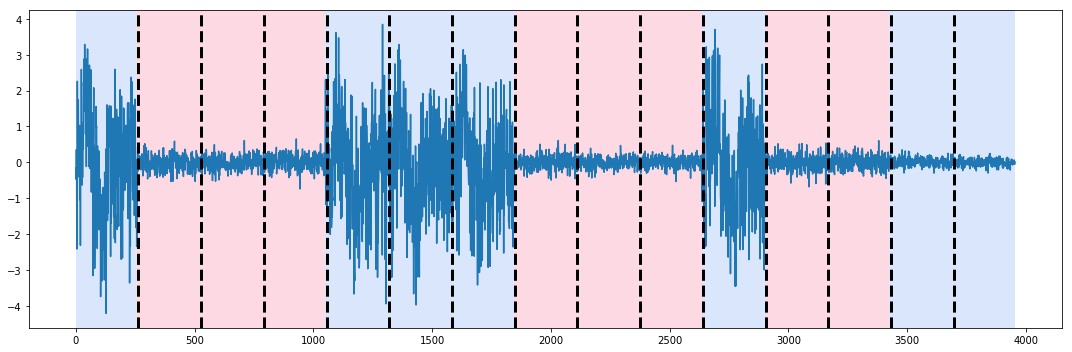

In [71]:
data = pca_pt5_test[5:15*264]
hb_pts = 264
heartbeat = 15
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(data)
my_bkps = algo.predict(pen=5)
bkps = np.arange(hb_pts, heartbeat*hb_pts, hb_pts)

# show results
fig, (ax,) = rpt.display(data, my_bkps, bkps, figsize=(15, 5))
plt.show()